<a href="https://colab.research.google.com/github/ZahraDehghani99/ML_MSc/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW3 - Question 2

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/ML/HW3/train.csv')
train.head()

,feature1,feature2,label
0,-0.586110,-0.974014,0.0
1,-1.503634,-0.505257,0.0
2,-1.280899,-0.152307,0.0
3,-0.023598,-1.526080,0.0
4,1.336478,-1.159745,1.0


تغییر برچسب های 0  به -1 برای استفاده در کلاس بند پرسپترون

In [ ]:
train['label'].replace(to_replace= 0, value = -1, inplace=True )
train.head()

,feature1,feature2,label
0,-0.586110,-0.974014,-1.0
1,-1.503634,-0.505257,-1.0
2,-1.280899,-0.152307,-1.0
3,-0.023598,-1.526080,-1.0
4,1.336478,-1.159745,1.0


In [ ]:
print(f'train shape : {train.shape}')

train shape : (4000, 3)


In [ ]:
print(f'mean of tarin data : \n{train.mean()}')

mean of tarin data : 
feature1    0.001328
feature2    0.010836
label      -0.003500
dtype: float64


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/ML/HW3/test.csv')
test.head()

,feature1,feature2,label
0,0.932599,-0.056269,1.0
1,1.060621,-0.148805,1.0
2,-0.903985,0.654105,0.0
3,-0.229572,-1.122811,0.0
4,1.640519,-0.243509,1.0


In [ ]:
test['label'].replace(to_replace= 0, value = -1, inplace=True )
test.head()

,feature1,feature2,label
0,0.932599,-0.056269,1.0
1,1.060621,-0.148805,1.0
2,-0.903985,0.654105,-1.0
3,-0.229572,-1.122811,-1.0
4,1.640519,-0.243509,1.0


In [ ]:
print(f'test shape : {test.shape}')

test shape : (1000, 3)


## Plotting train data

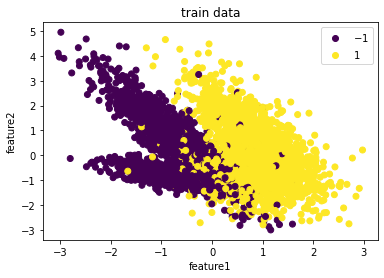

In [ ]:
# plot train data
scatter = plt.scatter(train['feature1'],train['feature2'],c=train['label'])
plt.title('train data')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend(*scatter.legend_elements())
plt.show()

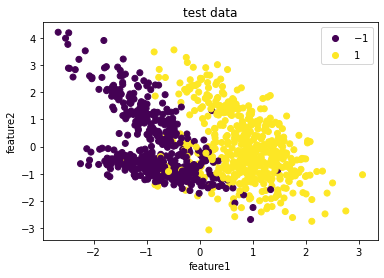

In [ ]:
# plot test data
scatter = plt.scatter(test['feature1'],test['feature2'],c=test['label'])
plt.title('test data')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend(*scatter.legend_elements())
plt.show()

## Separate X and y

In [ ]:
X_train = train.iloc[:, 0:2].values
y_train = train.iloc[:, 2].values
print(f'X_train shape : {X_train.shape}')

X_test = test.iloc[:, 0:2].values
y_test = test.iloc[:, 2].values
print(f'X_test shape : {X_test.shape}')

X_train shape : (4000, 2)
X_test shape : (1000, 2)


## Standardization

استاندارد سازی داده ها به طوری که میانگین کل داده ها را از تک تک داده ها کم می کند و داده ها را بر انحراف معیار تقسیم می کند با اینکار میانگین داده ها صفر می شود. البته در اینجا تاثیر زیادی ندارد زیرا خود داده ها تقریبا میانگین صفر دارند.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-0.56979331, -0.78218085],
       [-1.45975703, -0.40988776],
       [-1.24371276, -0.12957044],
       ...,
       [-0.0417291 , -1.09849639],
       [ 0.22925669,  0.30664144],
       [-1.62387193,  1.30120296]])

## Perceptron Classifier

In [ ]:
from sklearn.linear_model import Perceptron

perceptron_clf = Perceptron(tol=1e-3, random_state=0)
perceptron_clf.fit(X_train, y_train)
train_acc = perceptron_clf.score(X_train, y_train)
print(f'Accuracy on train data : {train_acc*100}% and Error on train: {(1-train_acc)*100}%' )

Accuracy on train data : 90.64999999999999% and Error on train: 9.350000000000003%


In [ ]:
y_pred = perceptron_clf.predict(X_test)
test_acc = perceptron_clf.score(X_test, y_test)
print(f'Accuracy on test data : {test_acc*100}% and Error : {(1-test_acc)*100}' )

Accuracy on test data : 91.9% and Error : 8.099999999999996


### Classification report for perceptron model

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.87      0.99      0.92       503
         1.0       0.99      0.85      0.91       497

    accuracy                           0.92      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.93      0.92      0.92      1000



In [ ]:
coeff = perceptron_clf.coef_
intercept = perceptron_clf.intercept_
print(f'w1 and w2 : {coeff} and bias : {intercept}')

w1 and w2 : [[4.36960923 1.64290813]] and bias : [-1.]


فرم معادله ما به صورت زیر است:

bias + w1*x1 + w2*x2 = 0

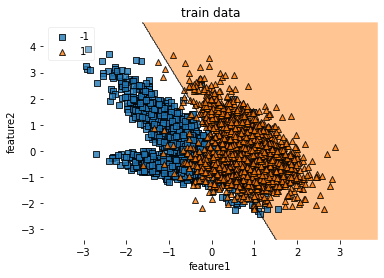

In [ ]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train.astype(np.int_), clf=perceptron_clf, legend=2)
plt.title('train data')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.show()

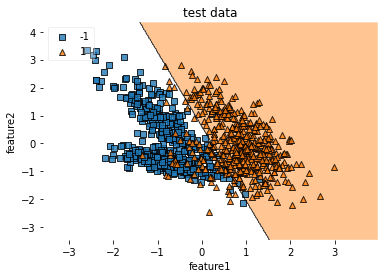

In [ ]:
plot_decision_regions(X_test, y_test.astype(np.int_), clf=perceptron_clf, legend=2)
plt.title('test data')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.show()

## LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [ ]:
lda.get_params()

{'covariance_estimator': None,
 'n_components': 1,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

همانطور که می بینیم بعد از اعمال این روش، به اندازه یک بعد در ابعاد داده کاهش داشته ایم.

In [ ]:
print(f'X_train shape after LDA : {X_train_lda.shape}')
print(f'X_test shape after LDA : {X_test_lda.shape}')

X_train shape after LDA : (4000, 1)
X_test shape after LDA : (1000, 1)


راستای بهیته را به صورت زیر بدست می آوریم که جز ویژگی های مدل ال دی ای است.
این راستا همان راستایی است که اگر داده ها را بر روی آن نگاشت دهیم داده های ما بیشترین فاصله رو از هم خواهند داشت.

In [ ]:
coeff = lda.coef_
intercept = lda.intercept_
print(f'w1 and w2 : {coeff} and bias : {intercept}')

w1 and w2 : [[5.14907626 1.55461745]] and bias : [-0.02091881]


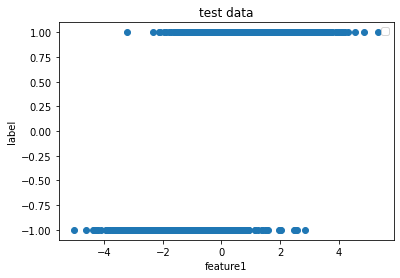

In [ ]:
# plot test data
scatter = plt.scatter(X_train_lda,y_train)
plt.title('test data')
plt.xlabel('feature1')
plt.ylabel('label')
plt.legend(*scatter.legend_elements())
plt.show()

In [ ]:
perceptron_clf = Perceptron(tol=1e-3, random_state=0)
perceptron_clf.fit(X_train_lda, y_train)
train_acc = perceptron_clf.score(X_train_lda, y_train)
print(f'Accuracy on train data : {train_acc*100}% and Error on train: {(1-train_acc)*100}' )

Accuracy on train data : 87.97500000000001% and Error on train: 12.024999999999997


In [ ]:
y_pred = perceptron_clf.predict(X_test_lda)
test_acc = perceptron_clf.score(X_test_lda, y_test)
print(f'Accuracy on test data : {test_acc*100}% and Error : {(1-test_acc)*100}' )

Accuracy on test data : 89.3% and Error : 10.7


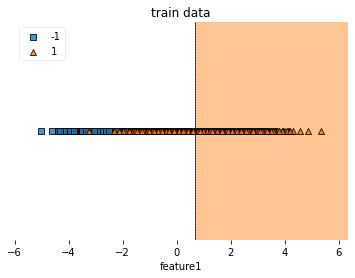

In [ ]:
plot_decision_regions(X_train_lda, y_train.astype(np.int_), clf=perceptron_clf, legend=2)
plt.title('train data')
plt.xlabel('feature1')
plt.show()

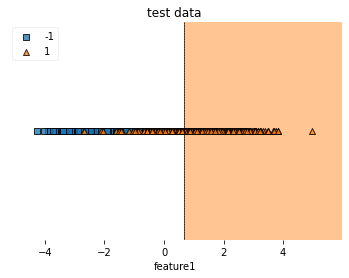

In [ ]:
plot_decision_regions(X_test_lda, y_test.astype(np.int_), clf=perceptron_clf, legend=2)
plt.title('test data')
plt.xlabel('feature1')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.83      0.99      0.90       503
         1.0       0.99      0.80      0.88       497

    accuracy                           0.89      1000
   macro avg       0.91      0.89      0.89      1000
weighted avg       0.91      0.89      0.89      1000



In [ ]:
def LDA_criteria(W, X_train):

  X0 = []
  X1 = []
  for i in range(len(X_train)):
    if y_train[i]==-1:
      X0.append(X_train[i]) 
    else:
      X1.append(X_train[i])  

  X0 = np.array(X0) 
  X1 = np.array(X1) 

  mean_0 = np.mean(X0, axis=0)
  mean_1 = np.mean(X1, axis=0)

  dif_mean = (mean_0 - mean_1).reshape(-1, 1)

  S_B = np.dot(dif_mean,dif_mean.T)

  S0, S1 = 0, 0

  for i in range(len(X0)):
    diffmean0 = (X0[i] - mean_0).reshape(-1, 1)
    S0 += np.dot(diffmean0, diffmean0.T)

  for i in range(len(X1)):
    diffmean1 = (X1[i] - mean_1).reshape(-1, 1)
    S1 += np.dot(diffmean1, diffmean1.T)

  S_W = S0 + S1

  sorat = np.dot(W.T, np.dot(S_B, W))
  makhraj = np.dot(W.T, np.dot(S_W, W))

  return sorat/makhraj


In [ ]:
W = np.zeros((2,1))
W[0][0] = 5.14907626 
W[1][0] = 1.55461745

lda_criteria = LDA_criteria(W, X_train)
print(f'LDA criteria on train data : {lda_criteria}')

LDA criteria on train data : [[0.00198939]]
